# <h1 align="center"> © RsydMathTech. </h1>

# Supermarket Sales Analysis


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

# Load data
url = "https://raw.githubusercontent.com/sushantag9/Supermarket-Sales-Data-Analysis/master/supermarket_sales%20-%20Sheet1.csv"
df = pd.read_csv(url)

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

---


## Ekstraksi Jam
Dataset transaksi supermarket diekstrak waktunya menjadi format jam, untuk melihat pola pembelian berdasarkan waktu.


In [37]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['Week'] = df['Date'].dt.isocalendar().week

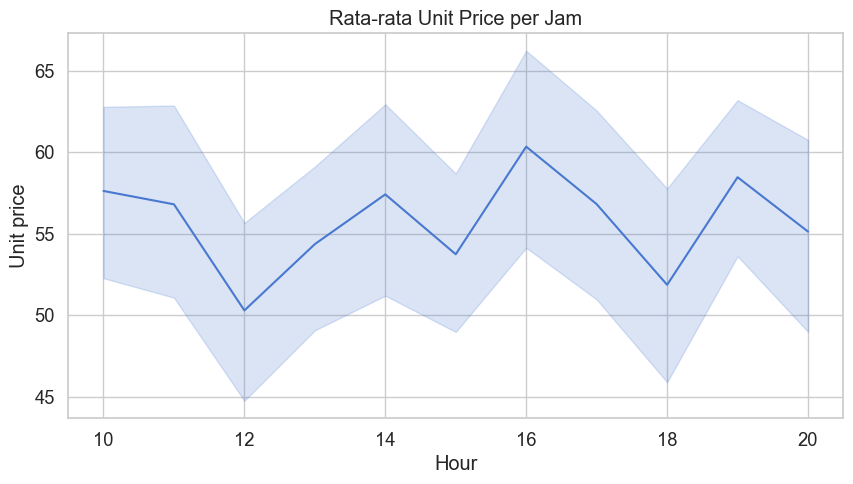

In [38]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Hour", y="Unit price", data=df, estimator="mean")
plt.title("Rata-rata Unit Price per Jam")
plt.show()

## Lineplot: Average Unit Price by Hour
Terlihat adanya fluktuasi harga unit di jam tertentu. Ini bisa mengindikasikan pola promo atau jenis produk tertentu.

---


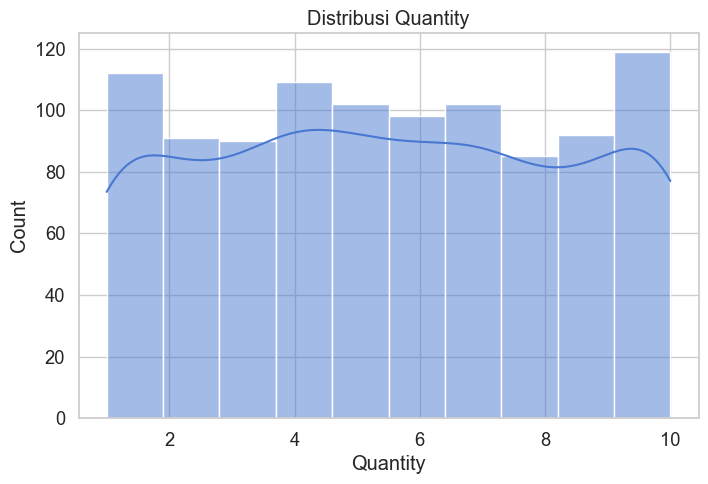

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(df["Quantity"], bins=10, kde=True)
plt.title("Distribusi Quantity")
plt.show()

## Histogram: Quantity Distribution
Distribusi kuantitas menunjukkan mayoritas pembelian dalam skala kecil, dengan outlier pada pembelian dalam jumlah besar.

---

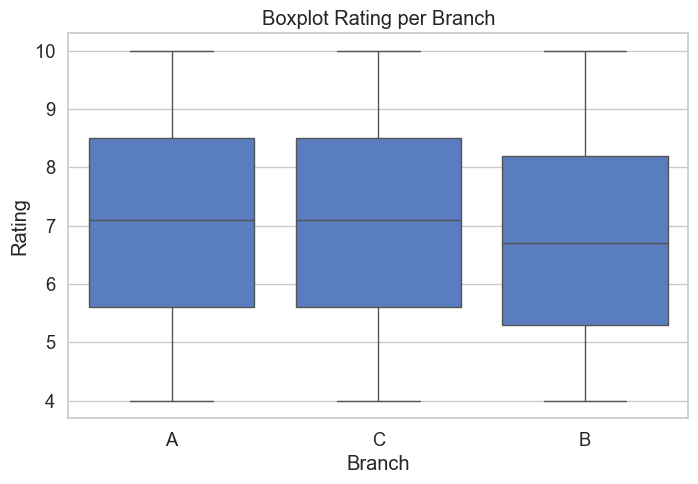

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Branch", y="Rating", data=df)
plt.title("Boxplot Rating per Branch")
plt.show()

## Boxplot: Customer Rating by Branch
Branch B memiliki rating yang lebih konsisten dibanding A dan C, yang lebih bervariasi.

----
## Kesimpulan
- Pola harga unit cenderung naik di jam tertentu (indikasi promo/jenis produk).
- Mayoritas pembelian dalam jumlah kecil, outlier di pembelian besar.
- Branch B punya rating lebih stabil, sedangkan A & C lebih fluktuatif.
